## **<h3 align="center"> Computational Intelligence for Optimization</h3>**
# **<h3 align="center">Evaluation Grid Search 1 </h3>**
**Group members:**<br>
Alexandra Pinto - 20211599@novaims.unl.pt - 20211599<br>
Julia Karpienia  - 20240514@novaims.unl.pt - 20240514<br>
Steven Carlson - 20240554@novaims.unl.pt - 20240554 <br>
Tim Straub - 20240505@novaims.unl.pt - 20240505

<a id = "toc"></a>

##  Table of Contents

1. [Introduction](#intro)
2. [Import & Setup](#import_setup)
3. [Loading Results](#load_results)
4. [Visualization of Fitness Convergence](#visualization)
   - 4.1. [All Configurations](#all_configs)
   - 4.2. [Elitism: False vs True](#elitism_false_true)
   - 4.3. [Comparison by Operators](#operator_comparison)
5. [Statistical Analysis](#stat_analysis)
   - 5.1. [Friedman Test](#friedman_test)
   - 5.2. [Post-hoc Nemenyi Test](#nemenyi_test)
6. [Top Performing Configurations Overview](#top_config)
7. [Summary of Best Configuration and Setup for Grid Search 2](#summary)



#  1. Introduction <a class="anchor" id="intro"></a> 

[Back to ToC](#toc)<br>

In this notebook, we evaluate the results from the first grid search, which focused on identifying the best mutation, crossover, and selection algorithms, as well as testing the impact of elitism on performance.

We fixed the following parameters:

- POP_SIZE = 100

- mut_prob = 0.1

- xo_prob = 0.9

The evaluated configurations vary the mutation, crossover, selection algorithm, and elitism options.

We analyze the median fitness across generations and apply non-parametric statistical tests to determine the significance of performance differences between configurations.

# 2. Import & Setup <a class="anchor" id="import_setup"></a>

[Back to ToC](#toc)<br>

This section loads all required packages, functions, and disables unnecessary warnings for clean output.

In [ ]:
# Let's load the functions created in evaluation.py
from Operators.evaluation import *

import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# 3. Loading Results <a class="anchor" id="load_results"></a>

[Back to ToC](#toc)<br>


Here, we load the convergence logs and summary CSV from the first grid search. We also split the results based on the elitism parameter to analyze them separately.

In [2]:
fitness_path = "fitness_logs_gs1"
summary_path = "ga_summary_gs1.csv"

In [3]:
fitness_dfs = load_fitness_logs(fitness_path)

Loaded 24 configurations from 'fitness_logs_gs1'


In [4]:
elitism_true_dfs = {k: v for k, v in fitness_dfs.items() if "elitism=True" in k}
elitism_false_dfs = {k: v for k, v in fitness_dfs.items() if "elitism=False" in k}

In [5]:
fitness_dfs.keys()

dict_keys(['POP=100 XO=0.9 mut_prob=0.1 mutation=single_player_swap_2teams crossover=crossover_swap_extreme_player selection_alg=tournament_selection elitism=False', 'POP=100 XO=0.9 mut_prob=0.1 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=tournament_selection elitism=False', 'POP=100 XO=0.9 mut_prob=0.1 mutation=single_player_swap_2teams crossover=crossover_swap_whole_position selection_alg=roulette_selection elitism=False', 'POP=100 XO=0.9 mut_prob=0.1 mutation=full_position_swap_2teams crossover=crossover_swap_whole_position selection_alg=tournament_selection elitism=True', 'POP=100 XO=0.9 mut_prob=0.1 mutation=full_position_swap_2teams crossover=crossover_swap_whole_position selection_alg=tournament_selection elitism=False', 'POP=100 XO=0.9 mut_prob=0.1 mutation=single_player_swap_2teams crossover=crossover_swap_whole_position selection_alg=tournament_selection elitism=False', 'POP=100 XO=0.9 mut_prob=0.1 mutation=single_player_shift_all_

# 4. Visualization of Fitness Convergence <a class="anchor" id="visualization"></a>

[Back to ToC](#toc)<br>


## 4.1. All Configurations <a class="anchor" id="all_configs"></a>

[Back to 4. Visualization of Fitness Convergence](#visualization)<br>

This plot shows the median fitness over generations for all configurations in the grid search.

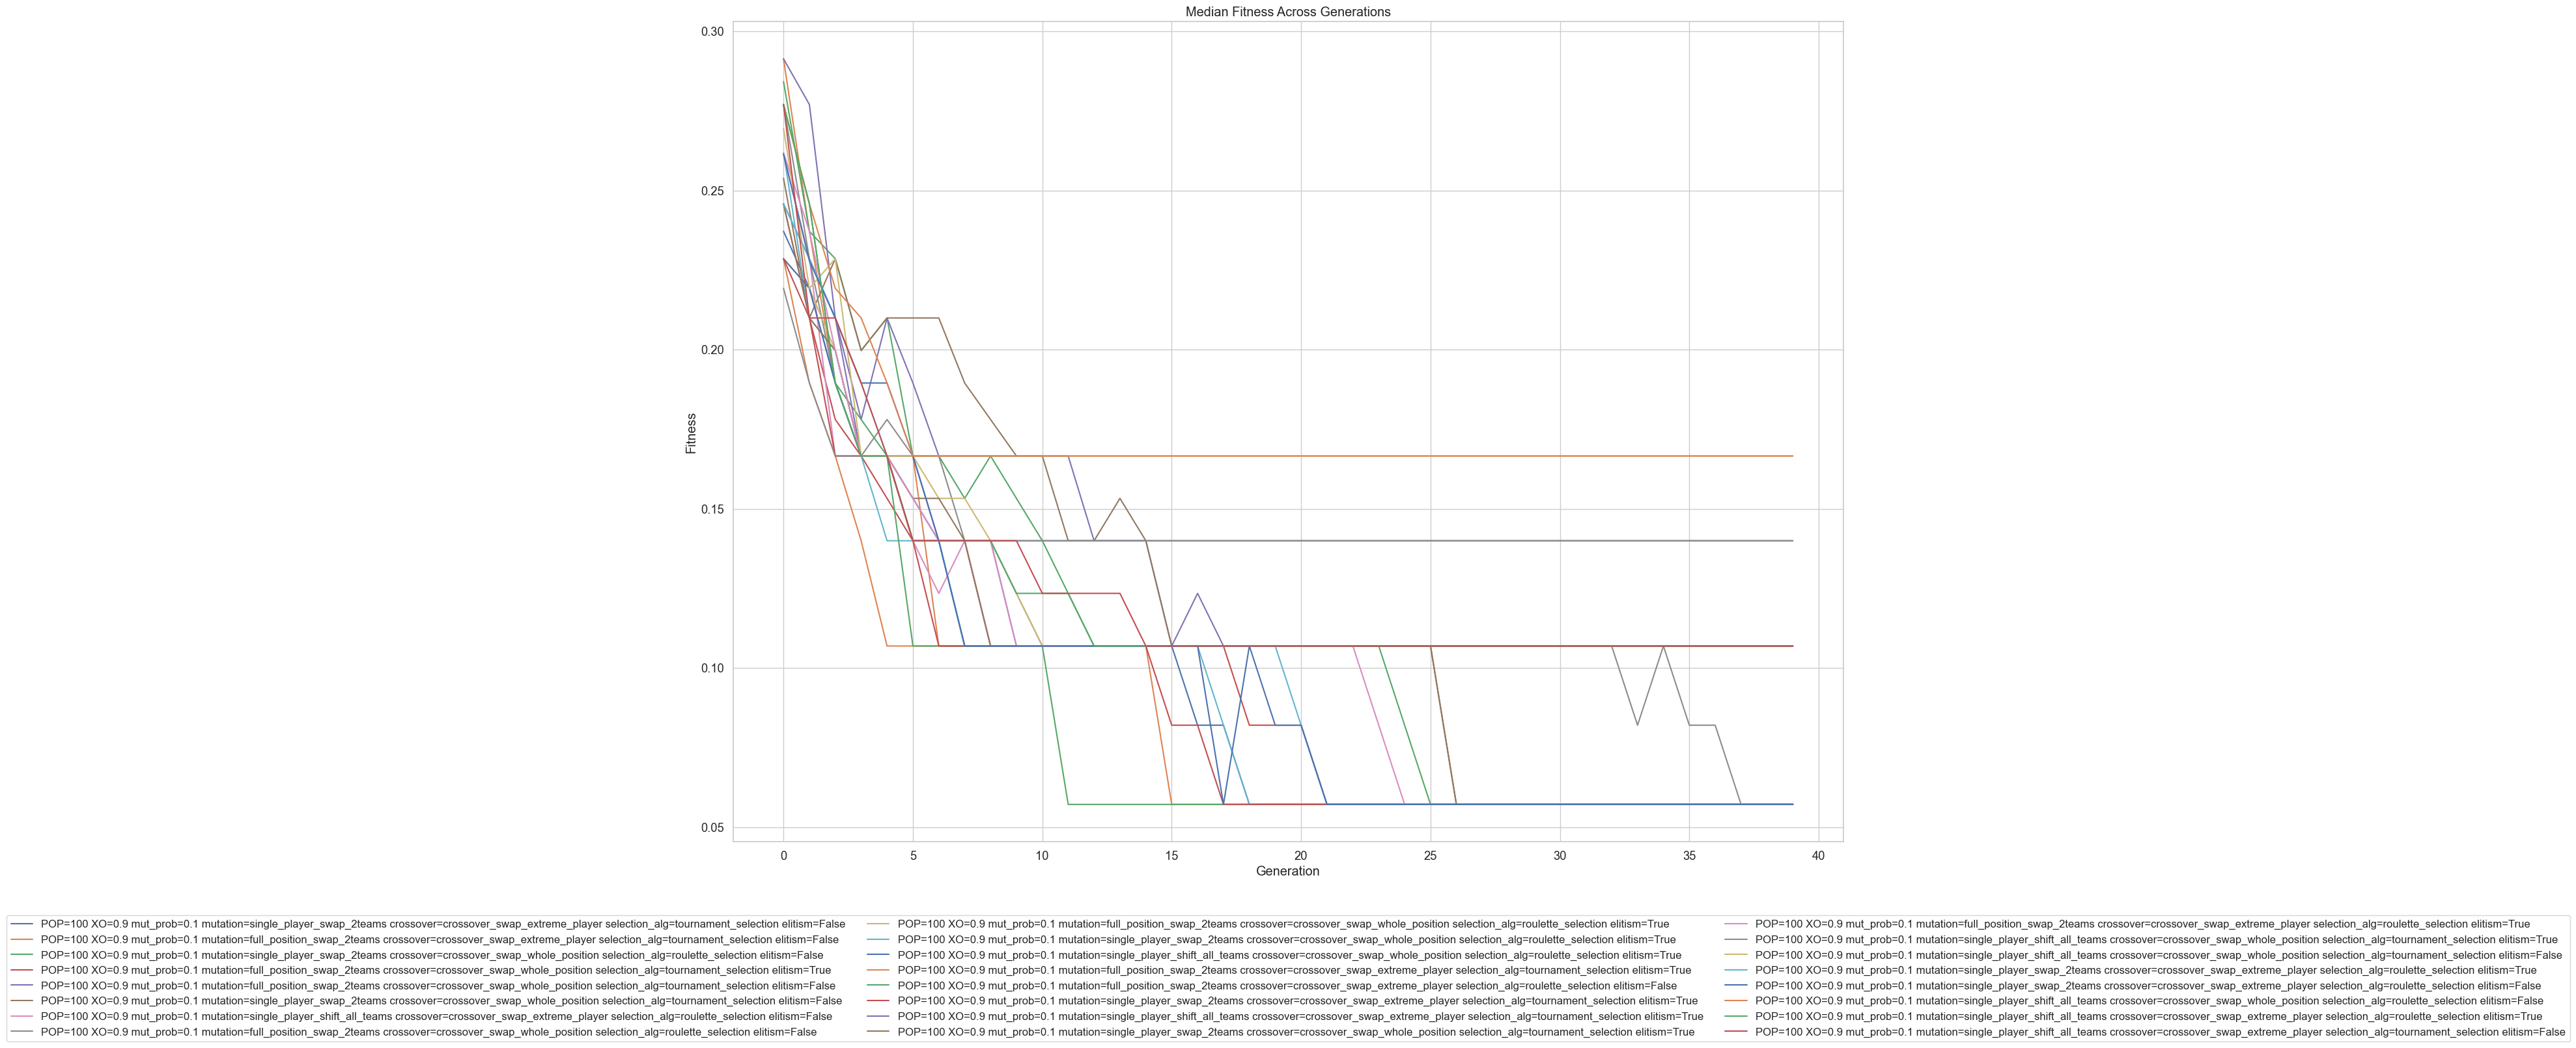

In [6]:
plot_median_fitness_over_gen(fitness_dfs)

This graph displays the median fitness across all possible configurations. Although it's not very readable due to the large number of combinations, it provides an overall view. To better understand how each parameter individually impacts performance, we will break down the plots by specific operators.

## 4.2. Elitism: False vs True <a class="anchor" id="elitism_false_true"></a>

[Back to 4. Visualization of Fitness Convergence](#visualization)<br>

Subset of plots for configurations where elitism is disabled.

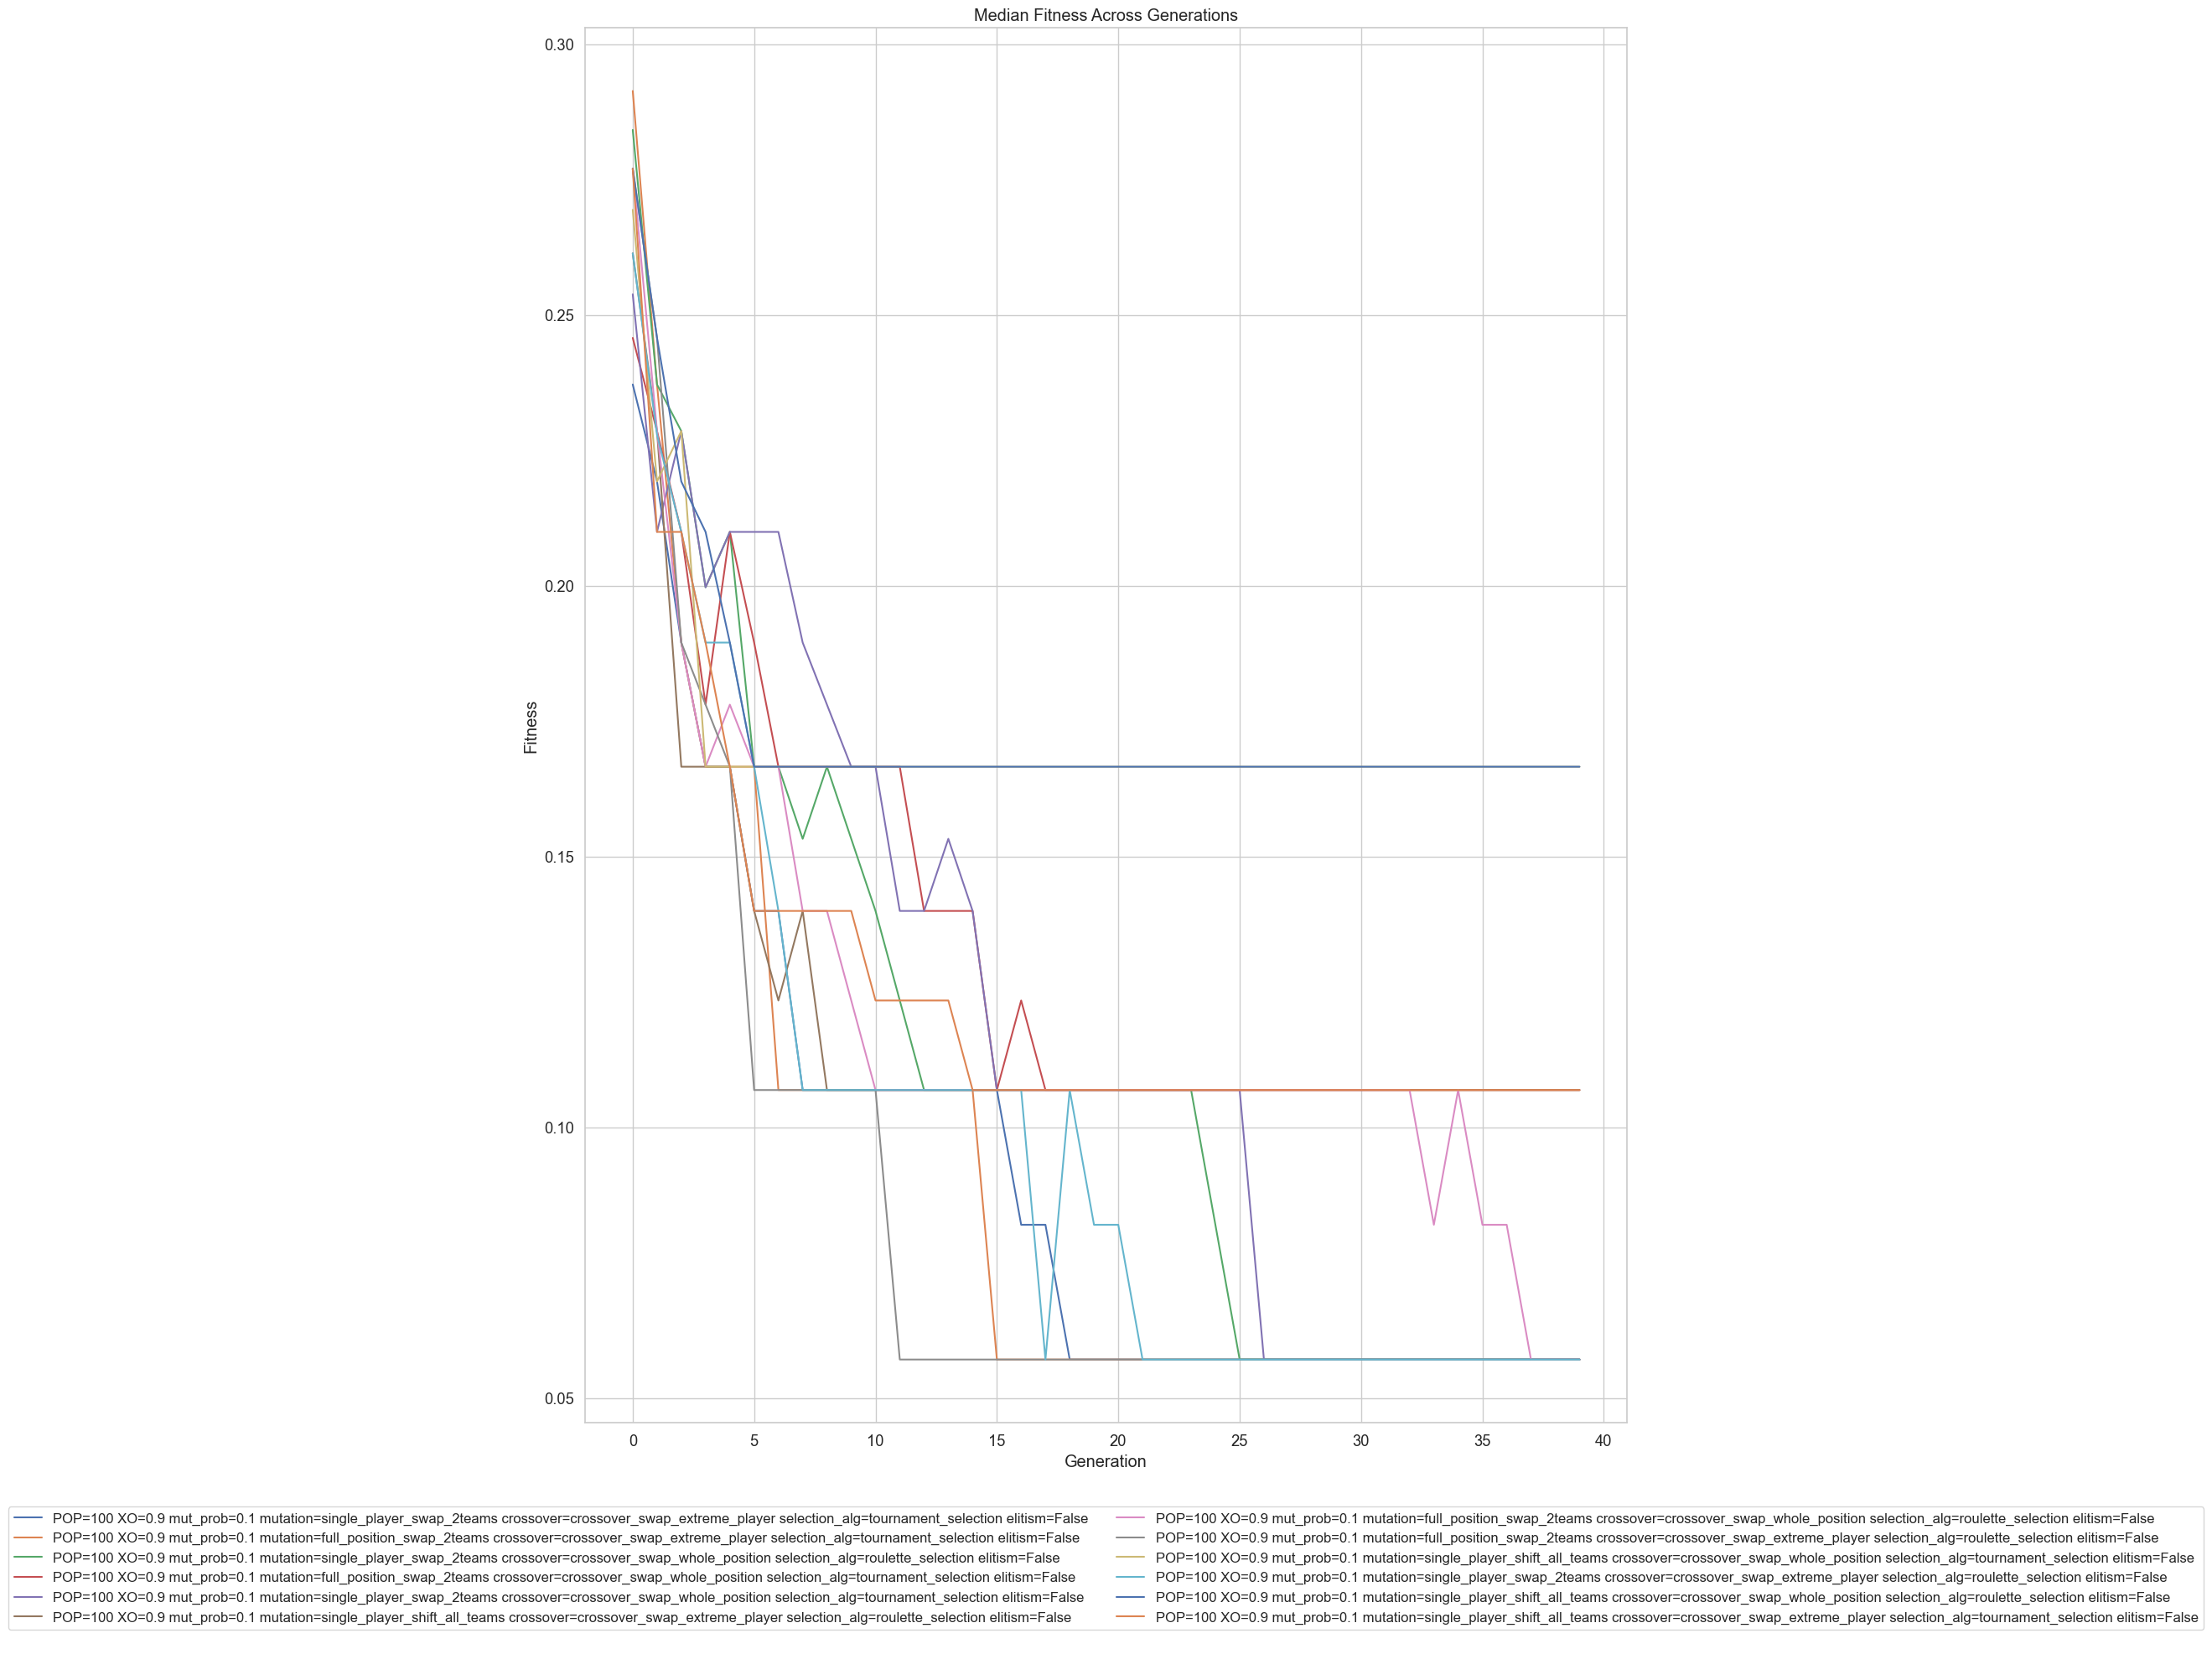

In [7]:
plot_median_fitness_over_gen(elitism_false_dfs, ncol=2)

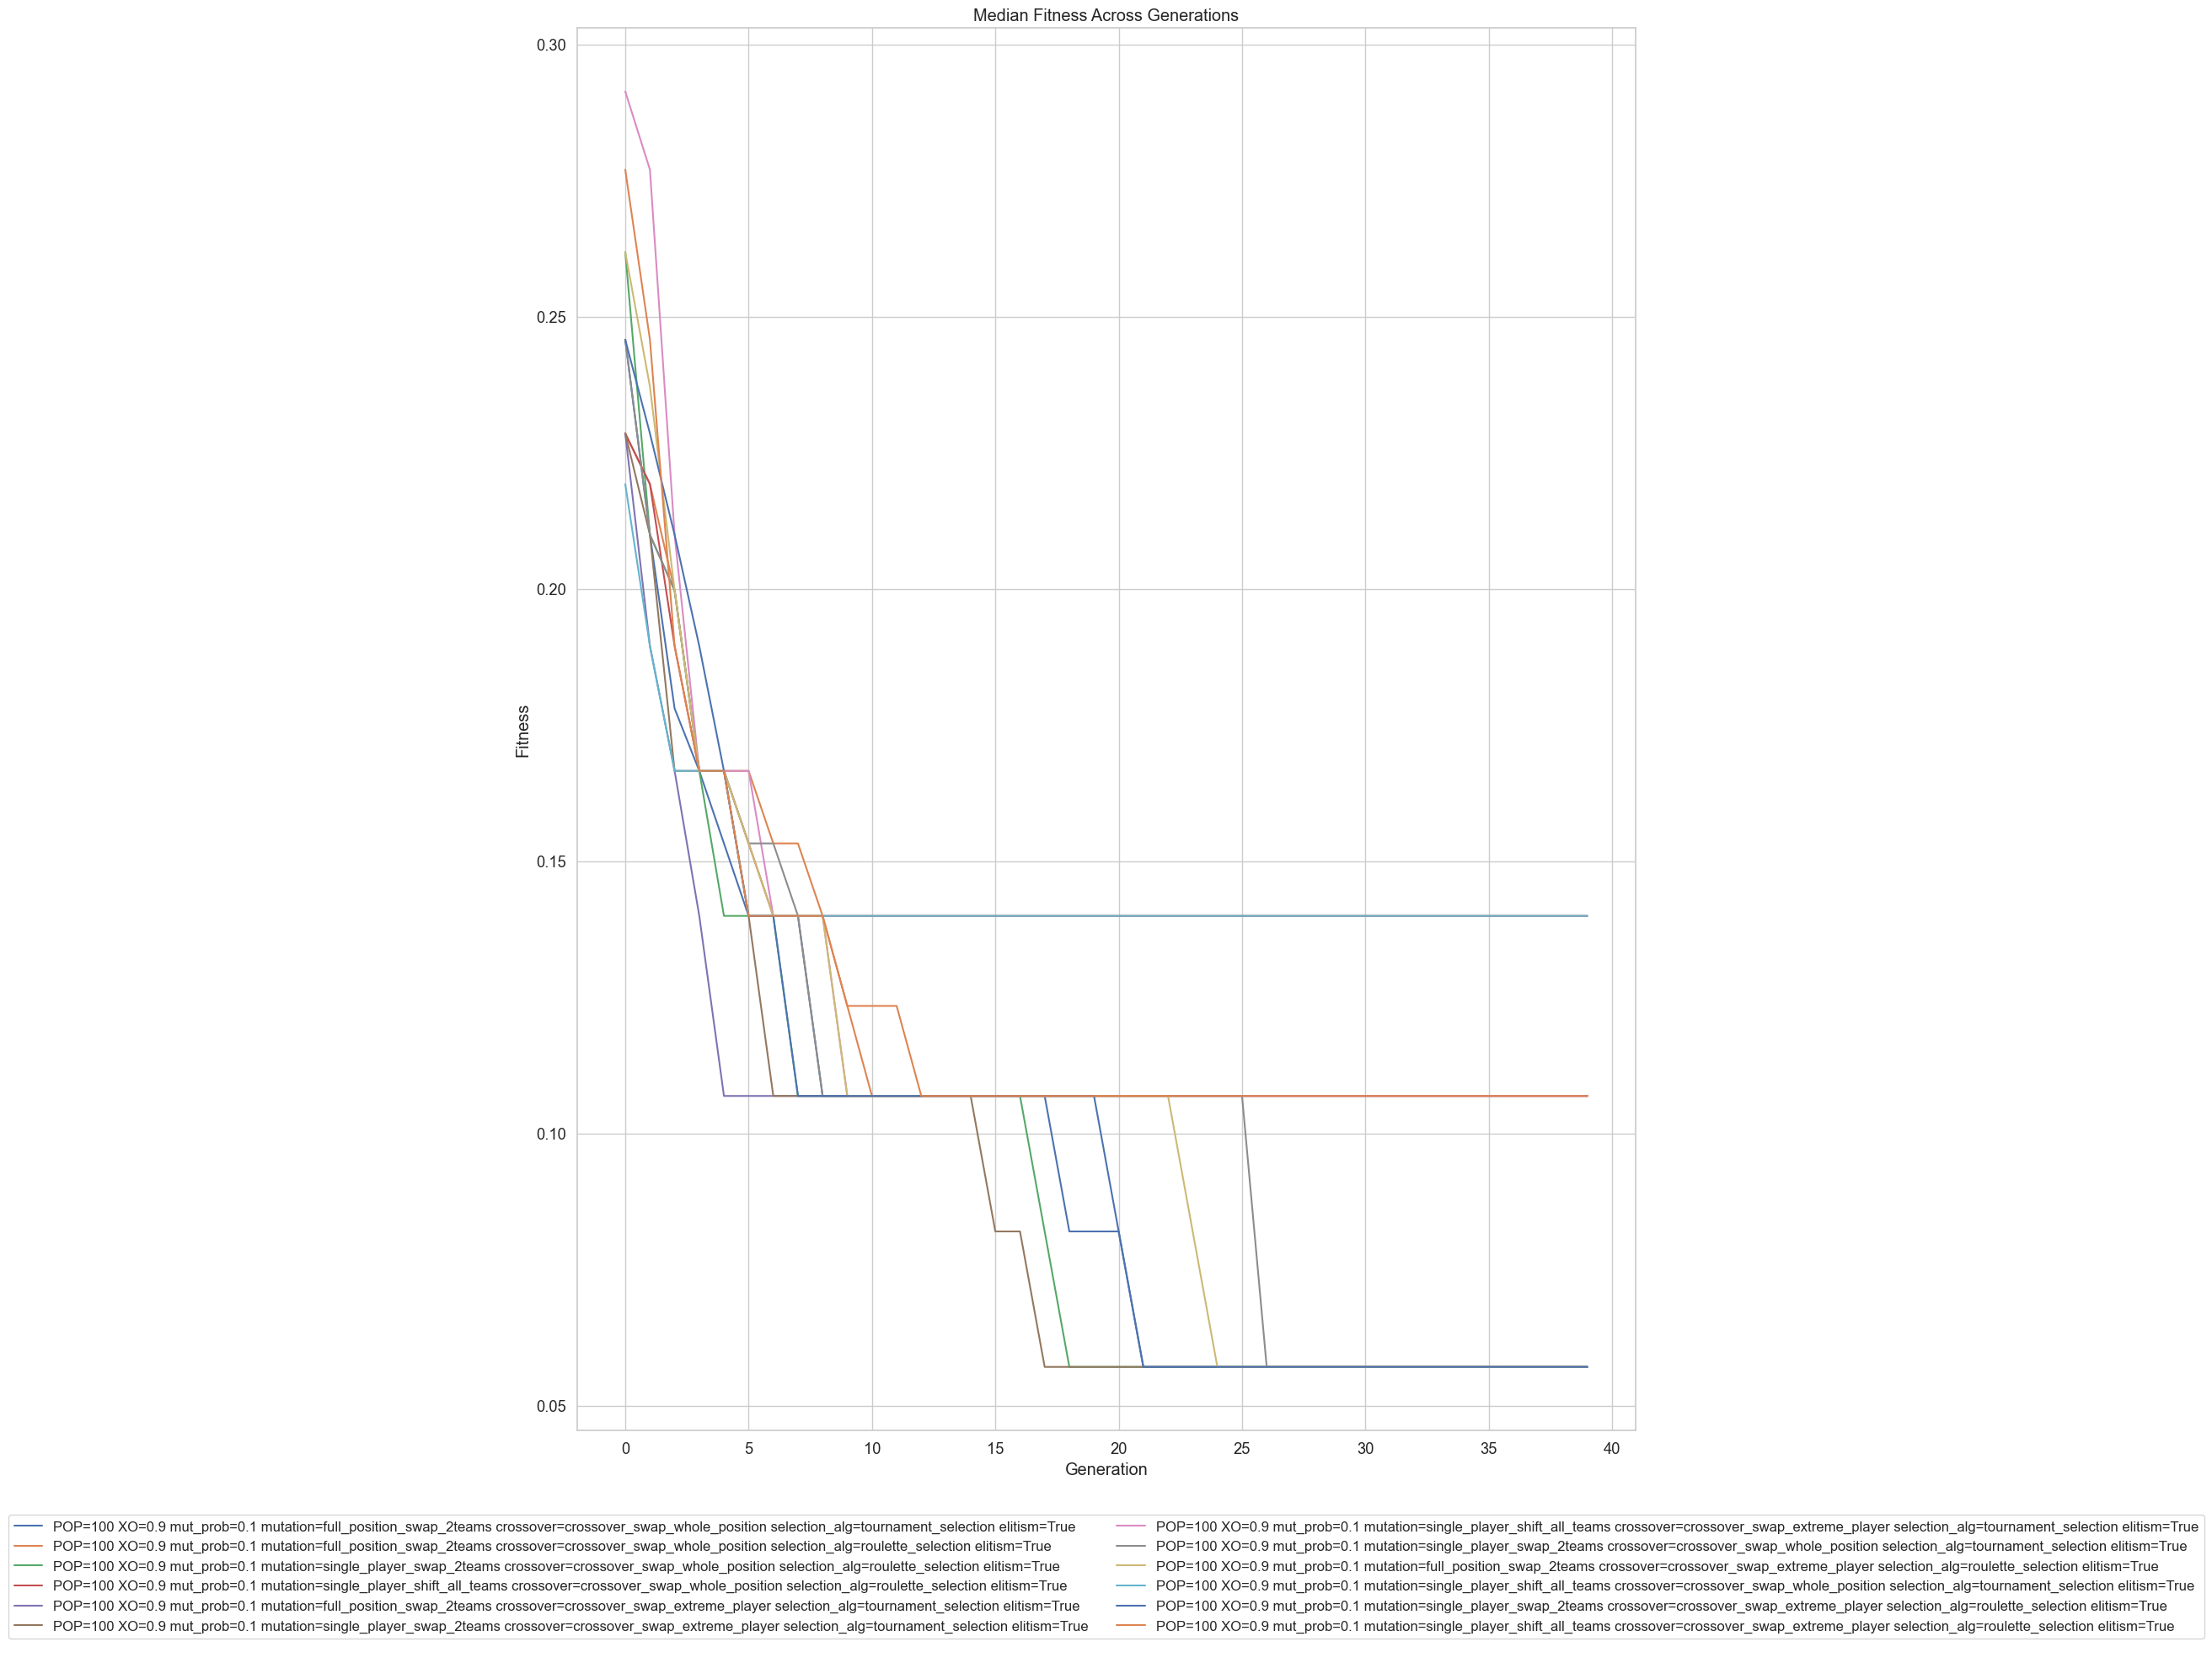

In [17]:
plot_median_fitness_over_gen(elitism_true_dfs, ncol=2)

These plots suggest that configurations with *elitism=False* tend to converge faster compared to those with *elitism=True*.

## 4.3. Comparison by Operators <a class="anchor" id="operator_comparison"></a>

[Back to 4. Visualization of Fitness Convergence](#visualization)<br>

This visualization compares median fitness grouped by mutation, crossover, and selection operators.

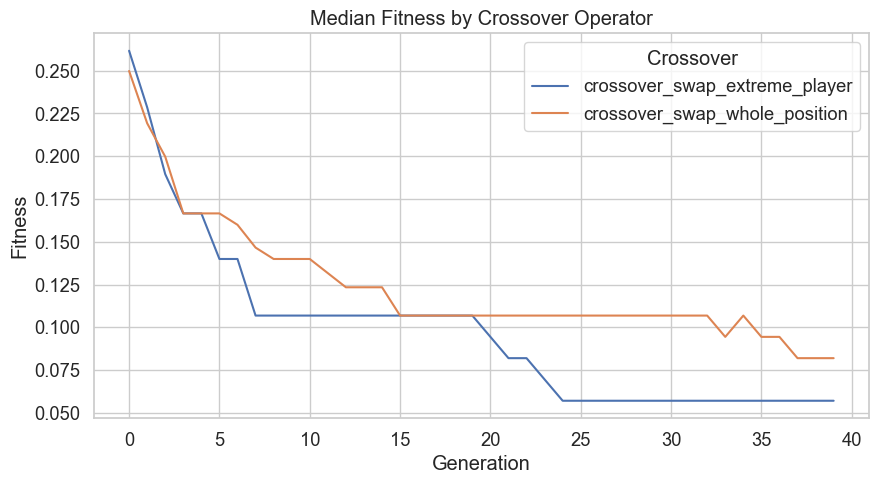

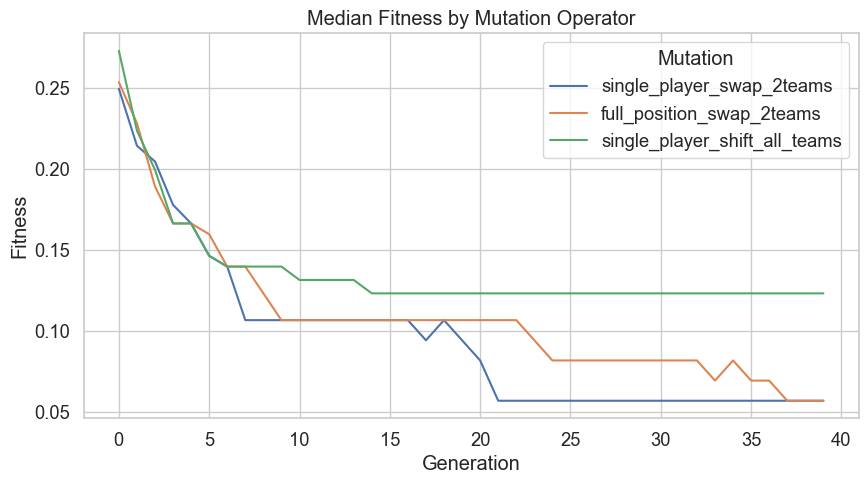

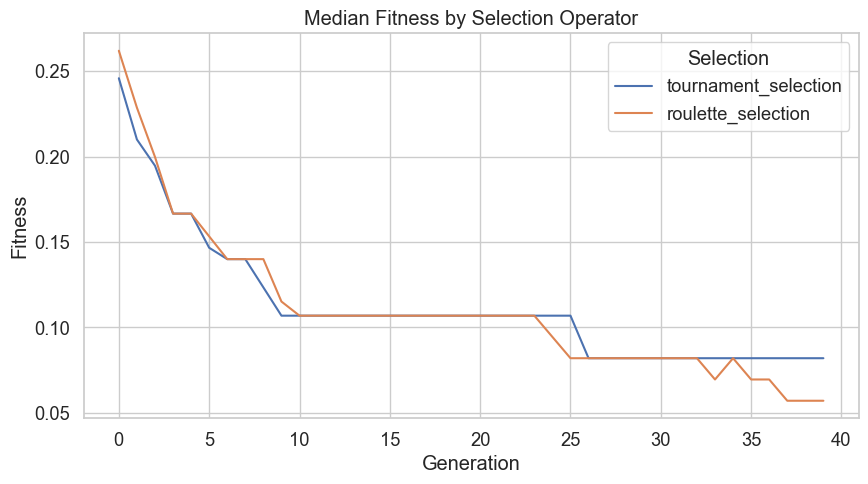

In [ ]:
plot_median_fitness_by_operator(fitness_path)

- The *crossover_swap_extreme_player* operator shows the fastest convergence and achieves the lowest fitness among the crossover options.
- For mutation, both *single_player_swap_2teams* and *full_position_swap_2teams* display similar behavior, though *single_player_swap_2teams* converges slightly faster and reaches a better fitness.
- Regarding selection methods, both *roulette_selection* and *tournament_selection* exhibit comparable performance.

# 5. Statistical Analysis <a class="anchor" id="stat_analysis"></a>

[Back to ToC](#toc)<br>

To statistically validate the observed differences between configurations, we use two non-parametric tests: Friedman Test and Post-hoc Nemenyi Test. The Friedman test, checks if there’s any significant difference across all configurations, uf there are significant difference then  apply the Nemenyi post-hoc test, which compares each pair of configurations



## 5.1. Friedman Test <a class="anchor" id="friedman_test"></a>

[Back to 5. Statistical Analysis](#stat_analysis)<br>

The Friedman test checks whether there are statistically significant differences in the rankings of configurations across multiple runs.

 Friedman Test (non-parametric ANOVA for repeated measures)

**Use when:** You want to compare 3 or more configurations across repeated runs (e.g., different crossover strategies).

**Assumption:** Repeated measurements across same conditions.

**Output:** Tells us if there is a statistically significant difference somewhere in the group.


Constraints:
* Same dataset: All configurations are tested on the same dataset
* Same number of runs: Each configuration must have the same number of runs (30)
* Same evaluation metric:  final fitness from each run

Null hypothesis (H₀): All configurations perform equally (no statistically significant difference in performance).

If p < 0.05: You can reject H₀ — at least one configuration performs significantly differently.

In [10]:
labels, results = run_friedman_test_on_best_fitness(fitness_dfs)


Friedman Test Results:
Test Statistic: 373.8070
P-value:        0.0000
Significant difference detected between configurations (reject H₀)


## 5.2. Post-hoc Nemenyi Test <a class="anchor" id="nemenyi_test"></a>

[Back to 5. Statistical Analysis](#stat_analysis)<br>

If the Friedman test shows significance, we use the Nemenyi post-hoc test to conduct pairwise comparisons between all configurations.



In [11]:
posthoc_results = run_posthoc_nemenyi_from_best_fitness(labels, results)


Post-hoc Nemenyi Test (p-values):
                                                    POP=100 XO=0.9 mut_prob=0.1 mutation=single_player_swap_2teams crossover=crossover_swap_extreme_player selection_alg=tournament_selection elitism=False  \
POP=100 XO=0.9 mut_prob=0.1 mutation=single_pla...                                             1.0000                                                                                                         
POP=100 XO=0.9 mut_prob=0.1 mutation=full_posit...                                             0.9829                                                                                                         
POP=100 XO=0.9 mut_prob=0.1 mutation=single_pla...                                             1.0000                                                                                                         
POP=100 XO=0.9 mut_prob=0.1 mutation=full_posit...                                             0.9606                                    

Let's plot the heatmap.

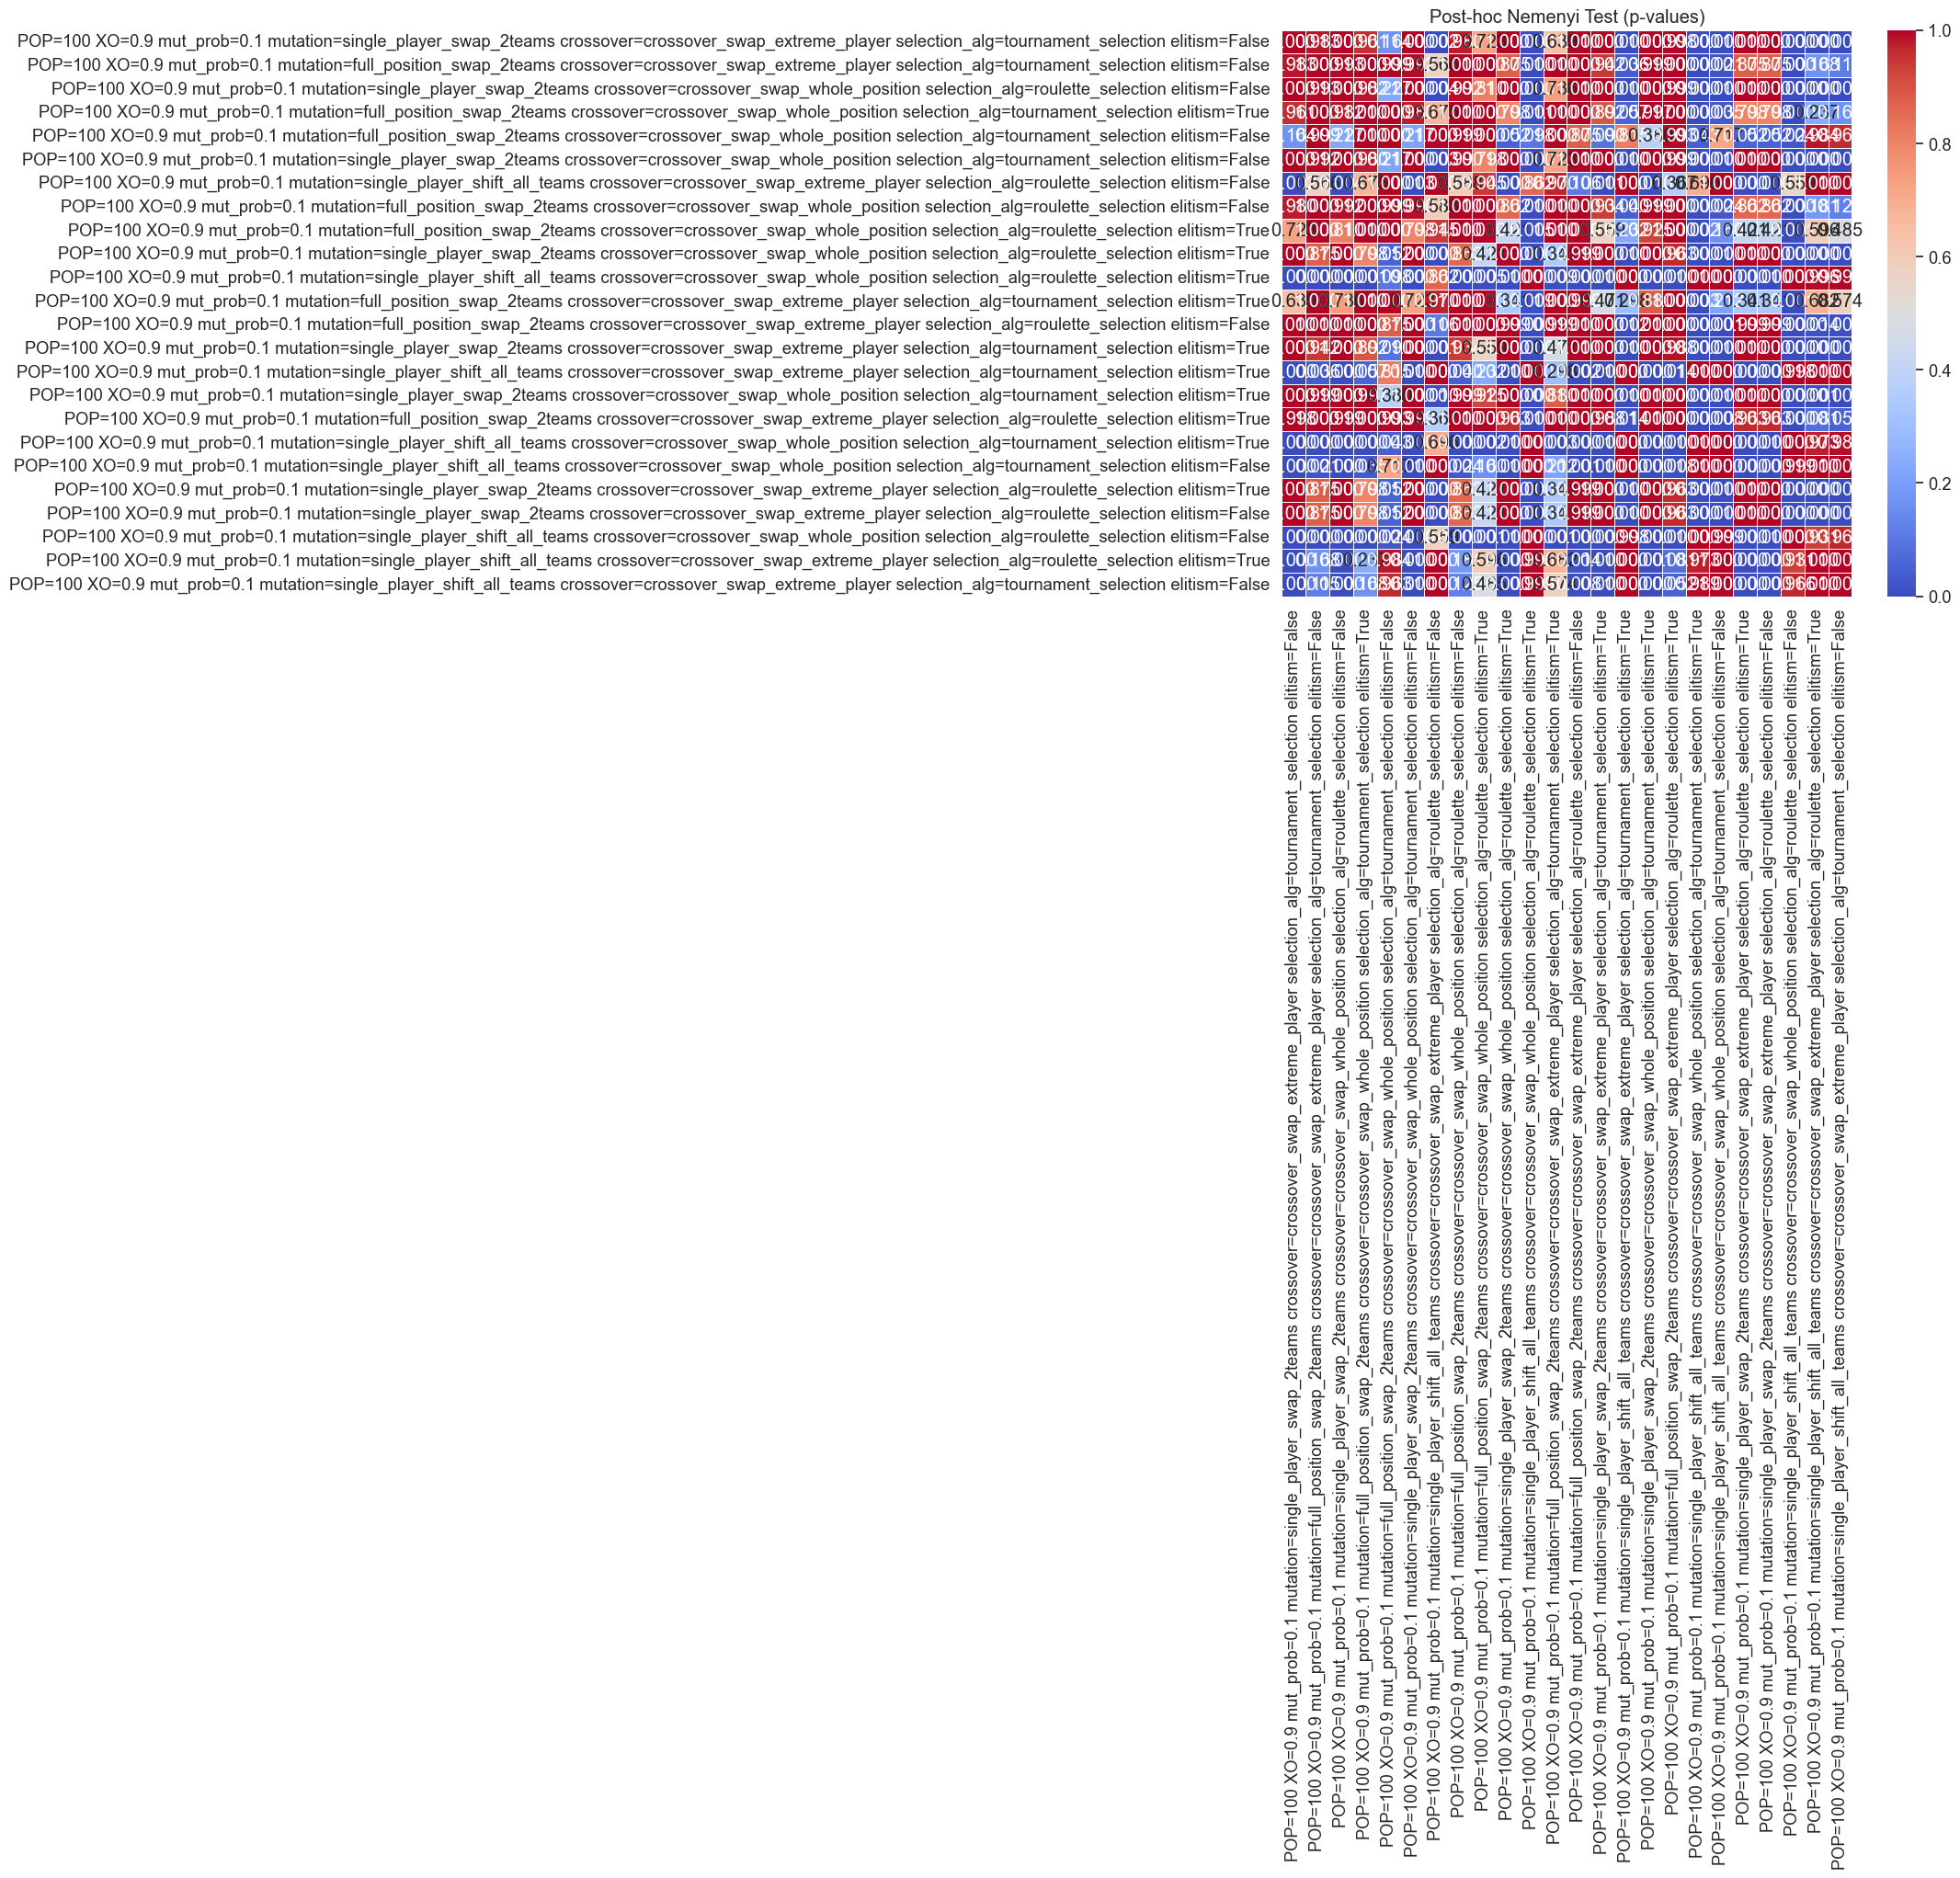

In [12]:
plot_posthoc_heatmap(posthoc_results)

The overall plot is not very readable, so we use the `summarize_significant_wins` function to identify the best-performing parameter combinations and their statistically significant wins.

In [13]:
summarize_significant_wins(posthoc_results)

Significant Wins
POP=100 XO=0.9 mut_prob=0.1 mutation=single_pla...                16
POP=100 XO=0.9 mut_prob=0.1 mutation=single_pla...                16
POP=100 XO=0.9 mut_prob=0.1 mutation=single_pla...                15
POP=100 XO=0.9 mut_prob=0.1 mutation=single_pla...                13
POP=100 XO=0.9 mut_prob=0.1 mutation=single_pla...                12
POP=100 XO=0.9 mut_prob=0.1 mutation=single_pla...                 9
POP=100 XO=0.9 mut_prob=0.1 mutation=single_pla...                 9
POP=100 XO=0.9 mut_prob=0.1 mutation=single_pla...                 8
POP=100 XO=0.9 mut_prob=0.1 mutation=single_pla...                 8
POP=100 XO=0.9 mut_prob=0.1 mutation=single_pla...                 8
POP=100 XO=0.9 mut_prob=0.1 mutation=single_pla...                 8
POP=100 XO=0.9 mut_prob=0.1 mutation=single_pla...                 8
POP=100 XO=0.9 mut_prob=0.1 mutation=single_pla...                 8
POP=100 XO=0.9 mut_prob=0.1 mutation=single_pla...                 8
POP=100 XO=0.9 mut_prob=0.1 mutation=single_pla...                 8
POP=100 XO=0.9 mut_prob=0.1 mutation=single_pla...                 8
POP=100 XO=0.9 mut_prob=0.1 mutation=full_posit...                 7
POP=100 XO=0.9 mut_prob=0.1 mutation=full_posit...                 5
POP=100 XO=0.9 mut_prob=0.1 mutation=full_posit...                 5
POP=100 XO=0.9 mut_prob=0.1 mutation=full_posit...                 5
POP=100 XO=0.9 mut_prob=0.1 mutation=full_posit...                 4
POP=100 XO=0.9 mut_prob=0.1 mutation=full_posit...                 3
POP=100 XO=0.9 mut_prob=0.1 mutation=full_posit...                 3
POP=100 XO=0.9 mut_prob=0.1 mutation=full_posit...                 2

The table ranks the configurations based on both performance and statistical confidence: <br>
– A higher number of **Significant Wins** means there's stronger evidence that the configuration consistently outperforms others. <br>
– This helps ensure we’re not just choosing a top performer by chance, but one that shows real, reliable improvement.


Config 1: It significantly beats 16 other configurations (with p < 0.05 in the Nemenyi test),
This suggests it’s a strong candidate for the best hyperparameter setup.

| POP | XO  | Mut Prob | Mutation                     | Crossover             | Selection Alg         | Elitism | Significant Wins | Interpretation                                                                 |
| --- | --- | -------- | ---------------------------- | --------------------- | --------------------- | ------- | ---------------- | ------------------------------------------------------------------------------ |
| 100 | 0.9 | 0.1      | shift\_all\_teams            | swap\_whole\_position | roulette\_selection   | False   | **16**           | Best performer without elitism; shows strong performance without preservation. |
| 100 | 0.9 | 0.1      | shift\_all\_teams            | swap\_whole\_position | tournament\_selection | True    | **16**           | Same setup as above but with elitism; equally strong performance.              |
| 100 | 0.9 | 0.1      | shift\_all\_teams            | swap\_whole\_position | roulette\_selection   | True    | 15               | Slight drop but still excellent with elitism.                                  |
| 100 | 0.9 | 0.1      | shift\_all\_teams            | swap\_whole\_position | tournament\_selection | False   | 13               | Still competitive, though weaker without elitism.                              |
| 100 | 0.9 | 0.1      | shift\_all\_teams            | swap\_extreme\_player | tournament\_selection | True    | 12               | Performs well with elitism and alternative crossover.                          |
| 100 | 0.9 | 0.1      | shift\_all\_teams            | swap\_extreme\_player | tournament\_selection | False   | 9                | Slightly weaker without elitism.                                               |
| 100 | 0.9 | 0.1      | shift\_all\_teams            | swap\_extreme\_player | roulette\_selection   | True    | 9                | Consistent with elitism; crossover still effective.                            |
| 100 | 0.9 | 0.1      | swap\_2teams                 | swap\_extreme\_player | tournament\_selection | True    | 8                | Good combo with elitism.                                                       |
| 100 | 0.9 | 0.1      | swap\_2teams                 | swap\_extreme\_player | roulette\_selection   | False   | 8                | Solid result even without elitism.                                             |
| 100 | 0.9 | 0.1      | swap\_2teams                 | swap\_extreme\_player | roulette\_selection   | True    | 8                | Very robust combo across selection types.                                      |
| 100 | 0.9 | 0.1      | swap\_2teams                 | swap\_whole\_position | tournament\_selection | True    | 8                | Reliable performance with elitism.                                             |
| 100 | 0.9 | 0.1      | swap\_2teams                 | swap\_extreme\_player | tournament\_selection | False   | 8                | Maintains strength across selection methods.                                   |
| 100 | 0.9 | 0.1      | swap\_2teams                 | swap\_whole\_position | roulette\_selection   | True    | 8                | Consistently high performer with elitism.                                      |
| 100 | 0.9 | 0.1      | shift\_all\_teams            | swap\_extreme\_player | roulette\_selection   | False   | 8                | Holds up well without elitism.                                                 |
| 100 | 0.9 | 0.1      | swap\_2teams                 | swap\_whole\_position | tournament\_selection | False   | 8                | Balanced and adaptable combo.                                                  |
| 100 | 0.9 | 0.1      | swap\_2teams                 | swap\_whole\_position | roulette\_selection   | False   | 8                | Good baseline setup.                                                           |
| 100 | 0.9 | 0.1      | full\_position\_swap\_2teams | swap\_extreme\_player | roulette\_selection   | False   | 7                | Acceptable performance but weaker than swap/shift mutations.                   |
| 100 | 0.9 | 0.1      | full\_position\_swap\_2teams | swap\_extreme\_player | tournament\_selection | False   | 5                | Drop in performance, especially without elitism.                               |
| 100 | 0.9 | 0.1      | full\_position\_swap\_2teams | swap\_extreme\_player | roulette\_selection   | True    | 5                | Slight recovery with elitism.                                                  |
| 100 | 0.9 | 0.1      | full\_position\_swap\_2teams | swap\_whole\_position | roulette\_selection   | False   | 5                | Fair, but not top-tier performer.                                              |
| 100 | 0.9 | 0.1      | full\_position\_swap\_2teams | swap\_whole\_position | tournament\_selection | True    | 4                | Below average despite elitism.                                                 |
| 100 | 0.9 | 0.1      | full\_position\_swap\_2teams | swap\_extreme\_player | tournament\_selection | True    | 3                | One of the weakest configurations tested.                                      |
| 100 | 0.9 | 0.1      | full\_position\_swap\_2teams | swap\_whole\_position | roulette\_selection   | True    | 3                | Doesn’t benefit much from elitism.                                             |
| 100 | 0.9 | 0.1      | full\_position\_swap\_2teams | swap\_whole\_position | tournament\_selection | False   | 2                | Lowest performing; weak across all settings.                                   |


# 6. Top Performing Configurations Overview  <a class="anchor" id="top_config"></a>

[Back to ToC](#toc)<br>

To better understand which configurations consistently performed well, we analyzed the top 10 based on both median fitness and fitness standard deviation. This helps identify not only the most accurate setups but also the most stable ones across runs.

We also include a boxplot showing the distribution of best fitness scores for each configuration to visualize the consistency and variability in performance.

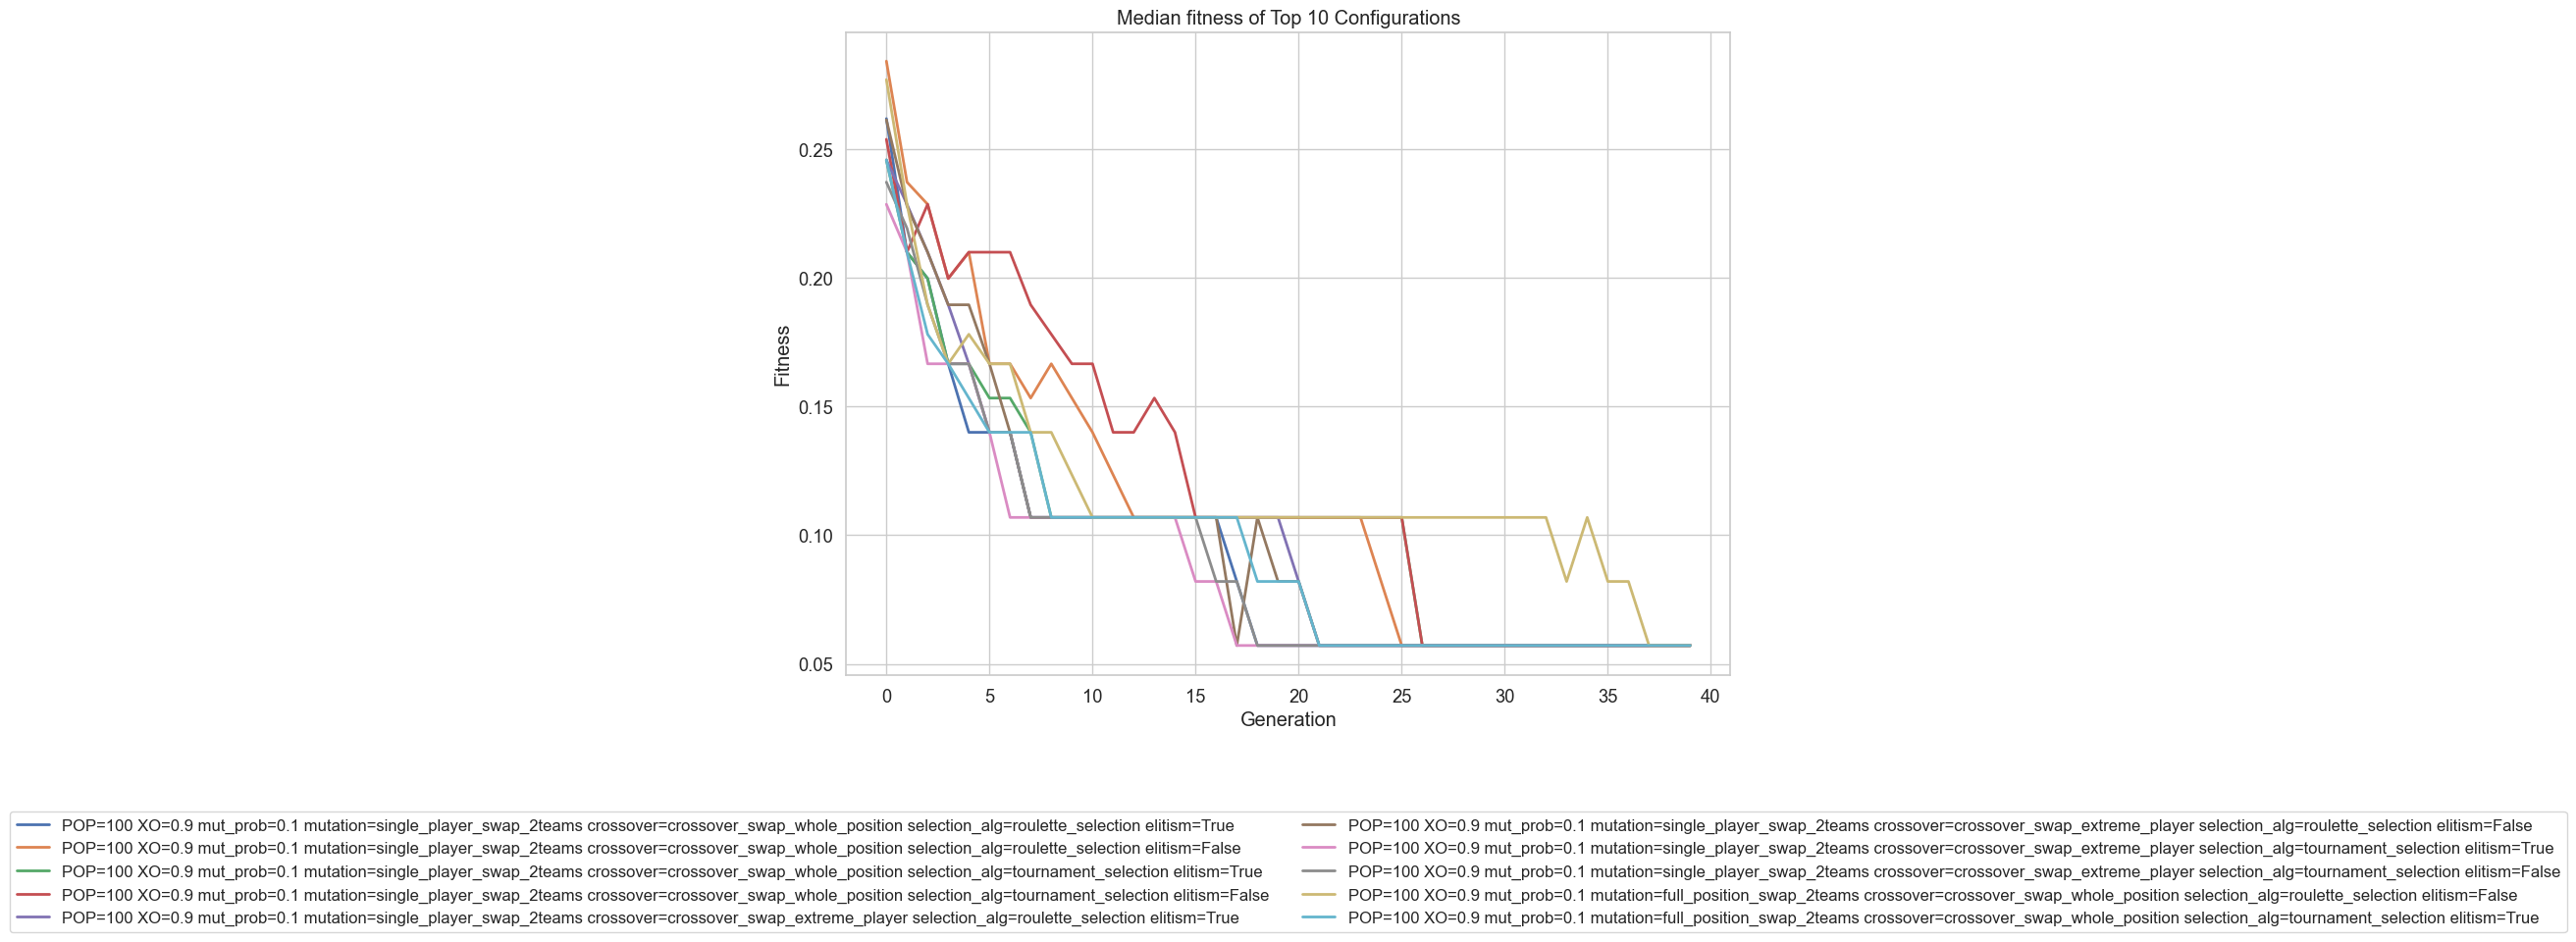

In [14]:
plot_top_configs(summary_path=summary_path,fitness_log_folder=fitness_path, top_n=10, metric='median_fitness')

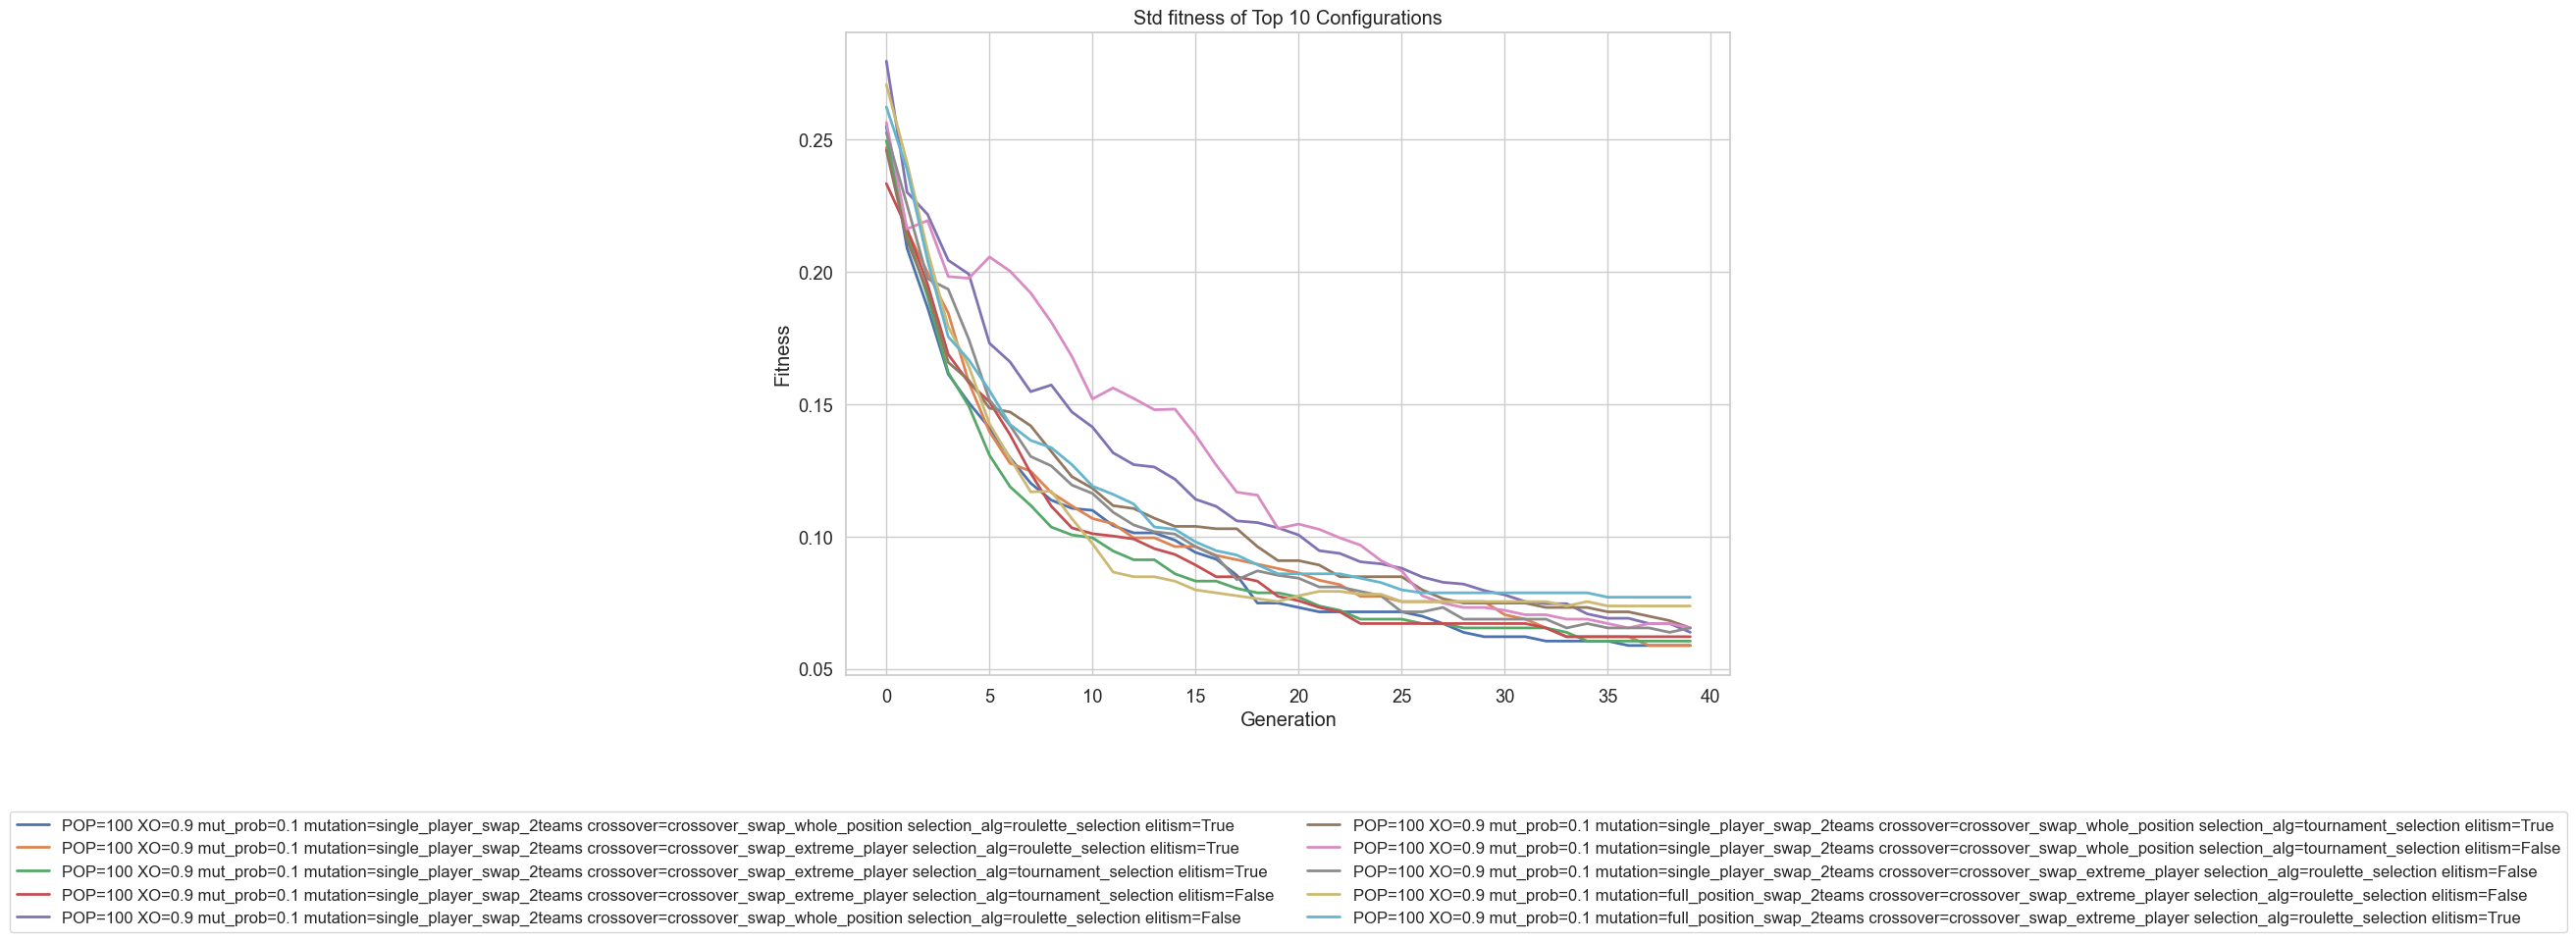

In [15]:
plot_top_configs(summary_path=summary_path,fitness_log_folder=fitness_path, top_n=10, metric="std_fitness")

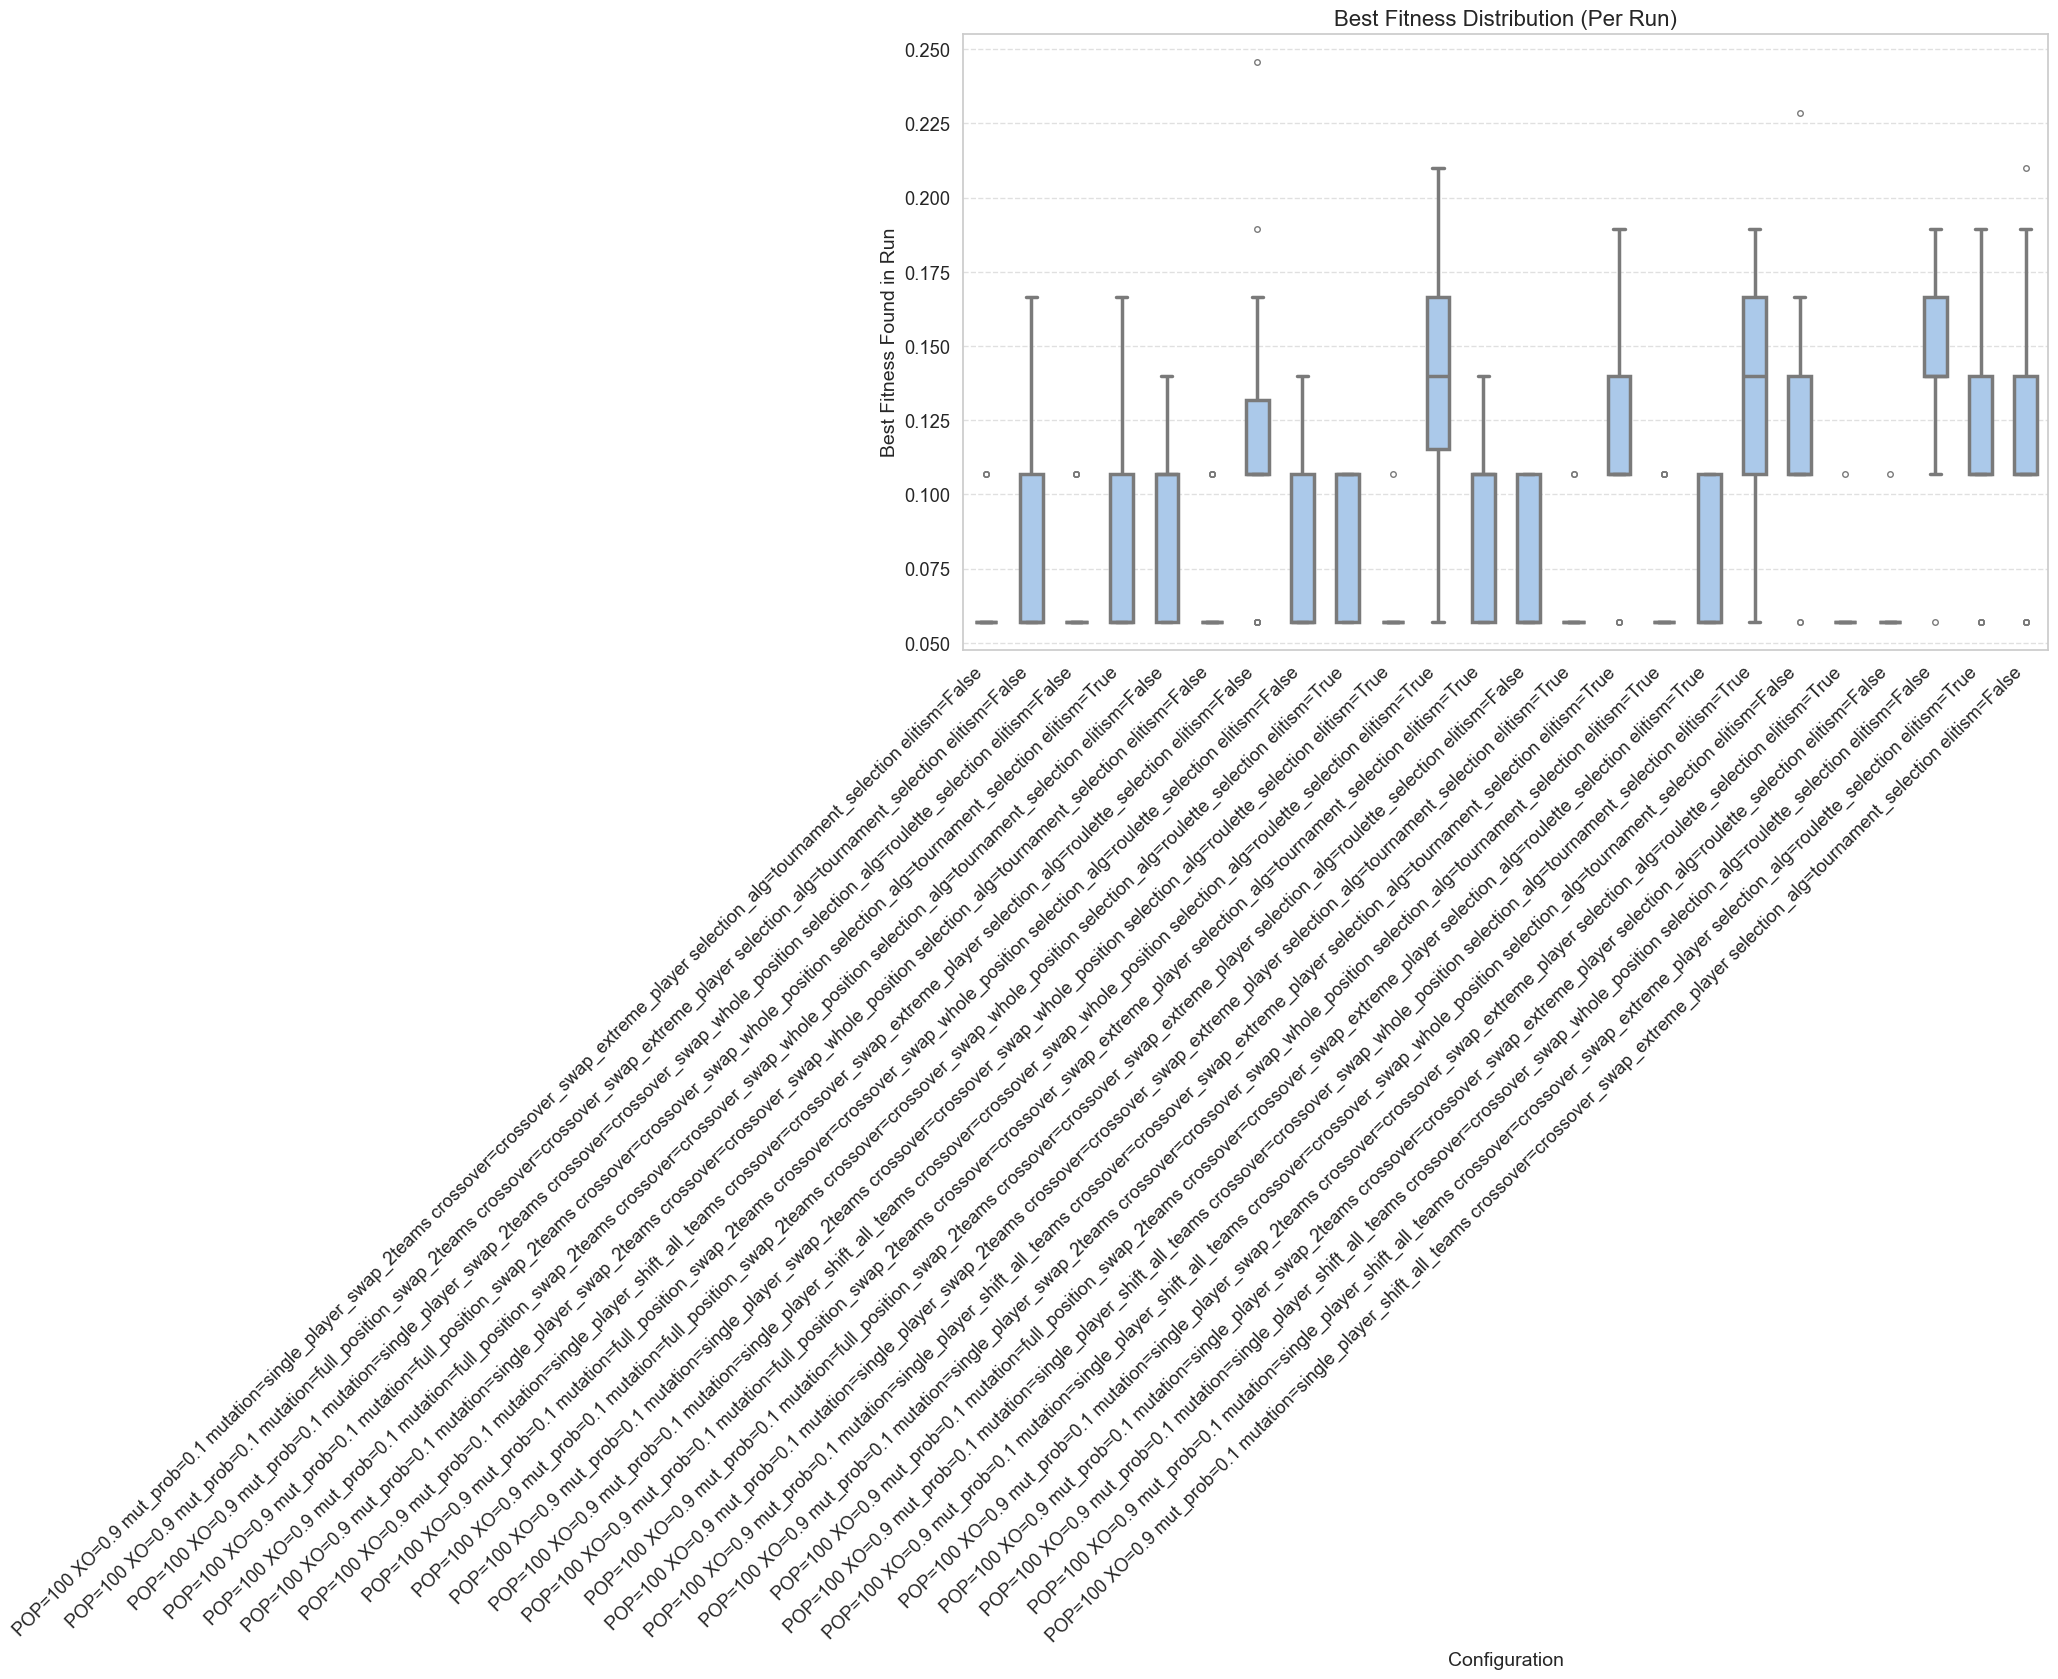

In [16]:
plot_best_fitness_boxplot(fitness_folder=fitness_path, title="Best Fitness Distribution (Per Run)")

# 7. Summary of Best Configuration and Setup for Grid Search 2 <a class="anchor" id="summary"></a>
[Back to ToC](#toc)<br>

Based on the performance analysis and statistical evaluation, we summarize the most promising configuration components. These choices will guide the design of the second grid search, where we will test different probability values for mutation and crossover. See: `evaluation_gs2` notebook for detailed analysis.

| Component     | Pick                            | Reason                                                                     |
| ------------- | ------------------------------- | -------------------------------------------------------------------------- |
| **Mutation**  | `full_position_swap_2teams`     | Best convergence in plot. `single_player_shift_all_teams` stagnates early. |
| **Crossover** | `crossover_swap_extreme_player` | Better final fitness in plot. Slightly better than whole position.         |
| **Selection** | `roulette_selection`            | Slight edge in final fitness + strong post-hoc presence.                   |
| **Elitism**   | `False`                          | Appears in top configs in post-hoc and generally improves convergence.     |
